In [59]:
# Importer les libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [60]:
# Importer le dataset

dataset = pd.read_csv('DimPatientCoded.csv')

In [61]:
#dimensions : nombre de lignes, nombre de colonnes
dataset.shape

(247236, 16)

In [62]:
#Visualiser les 5 premieres lignes
dataset.head()

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,1,1,India,2,0,1,4,2,0,0,4.0


In [63]:
del dataset['Unnamed: 0']
del dataset['Date Announced']
del dataset['Nationality']

In [64]:
#Modalités de la variable à expliquer
print(dataset['CovidAfterVaccin'].unique())


[0 1]


In [65]:
#Nombre d'observations par Modalité de la variable à expliquer
print(dataset.groupby('CovidAfterVaccin').size())


CovidAfterVaccin
0    185185
1     62051
dtype: int64


In [66]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

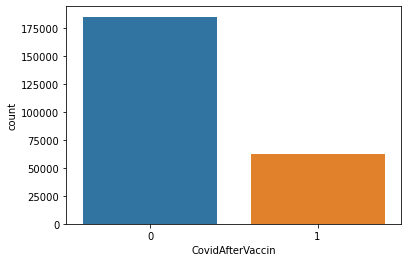

In [67]:
sn.countplot(dataset['CovidAfterVaccin'],label="Count")
plt.show()

In [68]:
#suppression des colonnes non utiles et déplacement de la colonne à prédire à la fin

del dataset['Age']
del dataset['Gender']
del dataset['Current Status']
del dataset['Type of trans']
del dataset['Symptoms']
del dataset['JobLoss']
del dataset['FinancialSituation']
del dataset['Profession']
del dataset['Reason']

dataset = dataset.reindex(columns=['Diseases','Vaccinated','Age Bracket','CovidAfterVaccin'])
dataset

,Diseases,Vaccinated,Age Bracket,CovidAfterVaccin
0,4,1,0,0
1,4,1,0,1
2,4,1,0,0
3,2,0,0,0
4,4,0,0,0
...,...,...,...,...
247231,4,1,0,1
247232,2,0,0,0
247233,2,0,0,0
247234,2,1,0,0


In [69]:
# diviser les données en attributs et étiquettes (labes)

X = dataset.iloc[:, [0,2]].values

y= dataset.iloc[:,3].values

In [70]:
# Splitting du dataset Training set and Test set (80%,20%)


from sklearn.model_selection import train_test_split
X_train, X_test, y__train, y_test=train_test_split(X,y, test_size=0.40)


In [71]:
# Feature Scaling / Mise en echelle: Normalisation & Standardisation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Normalisation
#minmaxscaler=MinMaxScaler()
#X_train_n=minmaxscaler.fit_transform(X_train)
#X_test_n=minmaxscaler.fit_transform(X_test)

#Standardisation
standarscaler= StandardScaler()
X_train=standarscaler.fit_transform(X_train)
X_test=standarscaler.fit_transform(X_test)


In [72]:
#Instanciation du modèle
modele_regLog = LogisticRegression(penalty='none')
# Apprentissage 
modele_regLog.fit(X_train, y__train)
#Prédiction
y_pred=modele_regLog.predict(X_test)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

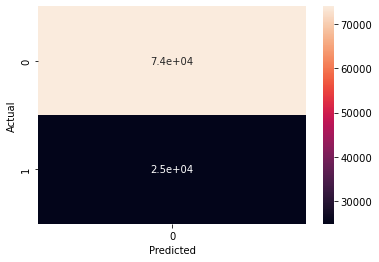

In [73]:
#Evaluation des performances
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     74055
           1       0.00      0.00      0.00     24840

    accuracy                           0.75     98895
   macro avg       0.37      0.50      0.43     98895
weighted avg       0.56      0.75      0.64     98895



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
